In [1]:
import pandas as pd
import os
from sklearn import linear_model
from sklearn.metrics import *
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Check if preprocessed dataSet is present for Classification
if not(os.path.isfile("Data/Cleaned/loanDataForClassification.csv") & os.path.isfile("Data/Cleaned/rejectLoanDataForClassification.csv")):
    rejectLoanFile = "Data/Cleaned/cleaned_reject_loandata.csv"
    loanFile = "Data/Cleaned/cleaned_loandata.csv"

    featuresFromRejectData = ['Amount Requested', 'Risk_Score', 'Debt-To-Income Ratio', 'State', 'Employment Length']
    featuresFromLoanData = ['loan_amnt', 'risk_score', 'dti', 'addr_state', 'emp_length', 'loan_status']


    rejectData = pd.read_csv(rejectLoanFile, encoding = "ISO-8859-1", low_memory= False, usecols = featuresFromRejectData)
    loanData = pd.read_csv(loanFile, encoding = "ISO-8859-1", low_memory= False, usecols = featuresFromLoanData)
    
    rejectData['Debt-To-Income Ratio'] = rejectData['Debt-To-Income Ratio'].str.replace('%','')
    rejectData['Debt-To-Income Ratio'] = rejectData['Debt-To-Income Ratio'].astype(np.float64)
    
    rejectData['Issue_Loan_Flag'] = 0
    loanData['Issue_Loan_Flag'] = 1

        # loanData['loan_status'].unique()
    loanData.loc[(loanData['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Charged Off'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Default'), ['Issue_Loan_Flag']] = 0
    featuresFromLoanData = ['loan_amnt', 'risk_score', 'dti', 'addr_state', 'emp_length', 'Issue_Loan_Flag']
    loanData = loanData[featuresFromLoanData]

        # Rename Columns
    columnNames = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'State', 'Employment_Length', 'Issue_Loan_Flag']
    loanData.columns = columnNames
    rejectData.columns = columnNames




        # Save dataset for classification
    loanData.to_csv("Data/Cleaned/loanDataForClassification.csv", sep=',', index = False)
    rejectData.to_csv("Data/Cleaned/rejectLoanDataForClassification.csv", sep=',', index = False)

else:
    loanData = pd.read_csv("Data/Cleaned/loanDataForClassification.csv", encoding = "ISO-8859-1", low_memory= False)
    rejectData = pd.read_csv("Data/Cleaned/rejectLoanDataForClassification.csv", encoding = "ISO-8859-1", low_memory= False)

In [2]:
def LogisticRegression(X_train,X_test, y_train, y_test):

    print("______________________START OF LOGISTIC REGRESSION____________________")

    lm = linear_model.LogisticRegression()
    lm.fit(X_train, y_train)

    train_pred = lm.predict(X_train)

    # R-squared score of this model

    rsq = r2_score(y_train, train_pred)

    pred = lm.predict(X_test)

    # MEAN ABSOLUTE ERROR
    mean_ae = mean_absolute_error(y_test, pred)

    # MEAN SQUARED ERROR
    mean_sqe = mean_squared_error(y_test, pred)

    # MEDIAN ABSOLUTE ERROR
    median_ae = median_absolute_error(y_test, pred)

    print("R-squared error : " + str(rsq) )

    print("MEAN ABSOLUTE ERROR  : " + str(mean_ae) )

    print("MEAN SQUARED ERROR : " + str(mean_sqe) )

    print("MEDIAN ABSOLUTE ERROR : " + str(median_ae) )



    print (accuracy_score(y_test, pred))


    # CONFUSION MATRIX
#     confusion_mat = confusion_matrix(y_test, pred)
#     print(confusion_mat)
    
    print (pd.crosstab(y_test, pred, rownames=["Actual"], colnames=["Pred"]))
#     ROC Curve
    
    fpr, tpr, _ = roc_curve(y_test, pred)
    
    
    plt.figure()
    plt.plot(fpr, tpr, label = 'ROC Curve')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve - Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()

    print("______________________END OF LOGISTIC REGRESSION____________________")

______________________START OF LOGISTIC REGRESSION____________________
R-squared error : 0.0993993513759
MEAN ABSOLUTE ERROR  : 0.0681368688759
MEAN SQUARED ERROR : 0.0681368688759
MEDIAN ABSOLUTE ERROR : 0.0
0.931863131124
Pred          0       1
Actual                 
0       9386697  607745
1         89723  152114


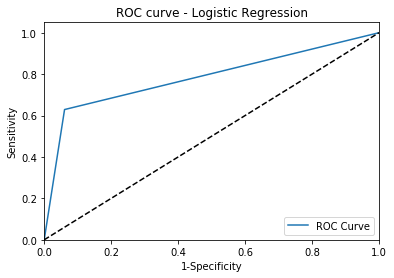

______________________END OF LOGISTIC REGRESSION____________________


In [3]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.1

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]


# print(trainLoanData.shape)
# print(testLoanData.shape)
# print(trainRejectData.shape)
# print(testRejectData.shape)
LogisticRegression(X_train,X_test, y_train, y_test)

______________________START OF LOGISTIC REGRESSION____________________
R-squared error : 0.122648265343
MEAN ABSOLUTE ERROR  : 0.0587208251101
MEAN SQUARED ERROR : 0.0587208251101
MEDIAN ABSOLUTE ERROR : 0.0
0.94127917489
Pred          0       1
Actual                 
0       8460394  423439
1        112422  129315


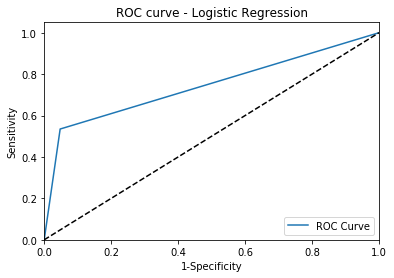

______________________END OF LOGISTIC REGRESSION____________________


In [4]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.2

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]


# print(trainLoanData.shape)
# print(testLoanData.shape)
# print(trainRejectData.shape)
# print(testRejectData.shape)
LogisticRegression(X_train,X_test, y_train, y_test)

______________________START OF LOGISTIC REGRESSION____________________
R-squared error : 0.105759532127
MEAN ABSOLUTE ERROR  : 0.0526502473854
MEAN SQUARED ERROR : 0.0526502473854
MEDIAN ABSOLUTE ERROR : 0.0
0.947349752615
Pred          0       1
Actual                 
0       5390214  171171
1        134310  106386


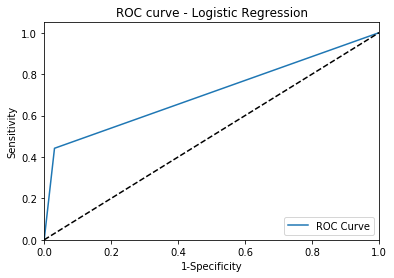

______________________END OF LOGISTIC REGRESSION____________________


In [5]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.5

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]


# print(trainLoanData.shape)
# print(testLoanData.shape)
# print(trainRejectData.shape)
# print(testRejectData.shape)
LogisticRegression(X_train,X_test, y_train, y_test)

______________________START OF LOGISTIC REGRESSION____________________
R-squared error : 0.0577418549077
MEAN ABSOLUTE ERROR  : 0.0824183796271
MEAN SQUARED ERROR : 0.0824183796271
MEDIAN ABSOLUTE ERROR : 0.0
0.917581620373
Pred          0      1
Actual                
0       2179740  60443
1        144052  96947


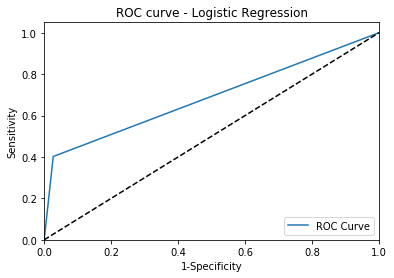

______________________END OF LOGISTIC REGRESSION____________________


In [6]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.8

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]


# print(trainLoanData.shape)
# print(testLoanData.shape)
# print(trainRejectData.shape)
# print(testRejectData.shape)
LogisticRegression(X_train,X_test, y_train, y_test)